# Machine Learning Work Flow, Pipe Line

**주의사항**
* preview)를 보고 할 것.
* 시각화에 날짜 붙이는 것에 너무 집착하지 말자.
    * 판다스를 경유하면 편하다.

# Training Work Flow

**무엇을 무슨 순서로 했는가?**
1. 여기에
2. 채워서
3. 적으면
4. 됩니다.

## 01. Data Loading

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

In [0]:
rides.shape

(17379, 17)

In [0]:
rides.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [0]:
rides.index

RangeIndex(start=0, stop=17379, step=1)

## 02. Train/Validation/Test Split
**실습**
1. 데이터를 분리 하시오.
    * 마지막 21일은 test_data로 분리
    * 그 다음 60일(-81 ~ -21)은 val_data로 분리
    * 나머지는 train_data로 분리

**주의사항**
* 이걸 제일 먼저 해야 한다.
* Training phase에서는
    1. 모든 탐색, 전처리규칙제작 등은 training set에서.
    2. validation셋에 대하여 고민해보자.


In [0]:
test_data = rides[-21*24:]
val_data = rides[-81*24:-21*24]
train_data = rides[:-81*24]

## 03. EDA for Feature Engineering

* EDA는 명확한 목적하에, 반드시 workflow에 도움이 되는 결과를 도출해야 함.
* EDA를 검색해봐도 좋음.

In [0]:
train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


무엇이 보이는가?


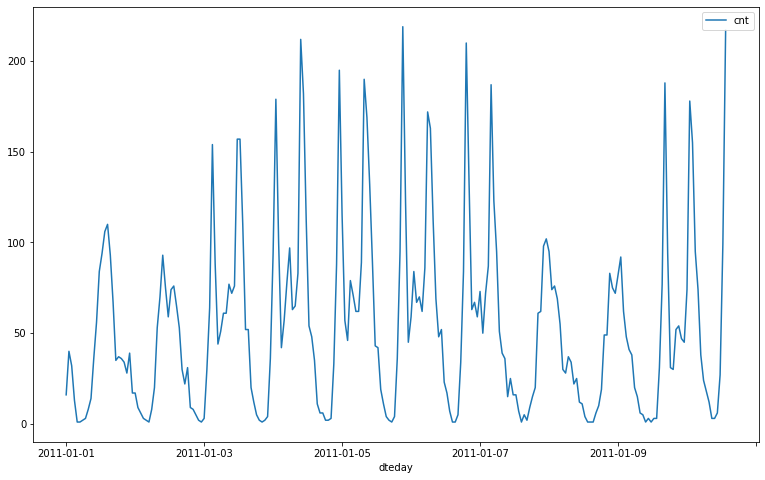

In [0]:
print('무엇이 보이는가?')
train_data[:24*10].plot(x='dteday', y='cnt', figsize=(13,8) )
# train_data[:24*10].plot(x='dteday', y=['registered','cnt'], figsize=(13,8) )

**EDA의 결론을 적으시오**<br>
Hint : Feature Engineering/Extraction 계획을 하시오.<br>
[궁금할지도 모르는 내용](https://datascience.stackexchange.com/questions/29006/feature-selection-vs-feature-extraction-which-to-use-when)


## 04. Feature Engineering.

**주의사항** : 여기에서 제작 한 것을, test셋에서도 사용하게 될 것이다. 마구잡이로 하면 안됨

1. any ideas : ?
1. dummy : season, weathersit, hr, weekday
2. scaling : ?
3. drop : casual, registered, weekday, yr, instant
4. impute : ?


In [0]:
train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [0]:
train_data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15430,15431,2012-10-10,4,1,10,3,0,3,1,2,0.46,0.4545,0.88,0.0000,0,6,6
15431,15432,2012-10-10,4,1,10,4,0,3,1,2,0.46,0.4545,0.88,0.1045,0,6,6
15432,15433,2012-10-10,4,1,10,5,0,3,1,2,0.46,0.4545,0.88,0.0896,2,38,40
15433,15434,2012-10-10,4,1,10,6,0,3,1,2,0.46,0.4545,0.88,0.0896,3,172,175
15434,15435,2012-10-10,4,1,10,7,0,3,1,1,0.46,0.4545,0.82,0.1045,9,498,507


In [0]:
dummy_fields = ['season', 'mnth', 'hr', 'weathersit']
for each in dummy_fields:
    dummies = pd.get_dummies(train_data[each], prefix=each, drop_first=False)
    train_data = pd.concat([train_data, dummies], axis= 1)

train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
drop_fields = ['instant', 'dteday', 'season', 'mnth', 'hr', 'weekday', 'weathersit', 'casual', 'registered']
data_train = train_data.drop(drop_fields, axis=1)
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.2879,0.81,0.0,16,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,13,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
data_train.shape

(15435, 52)

In [0]:
y_train = data_train['cnt']
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [0]:
x_train = data_train.drop('cnt', axis=1)
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.2879,0.81,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
x_train.shape

(15435, 51)

In [0]:
quant_features = ['temp', 'atemp', 'hum', 'windspeed']
scaled_features = {}
for each in quant_features:
    mean, std = x_train[each].mean(), x_train[each].std()
    scaled_features[each] = [mean, std]
    x_train.loc[:, each] = (x_train[each] - mean)/std

x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,-1.400633,-1.159737,0.939245,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,-1.503242,-1.247158,0.888077,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,-1.503242,-1.247158,0.888077,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,-1.400633,-1.159737,0.632241,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,-1.400633,-1.159737,0.632241,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
x_train_num = x_train.values
y_train_num = y_train.values

print(x_train_num, y_train_num)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]] [ 16  40  32 ...  40 175 507]


Validation Data 만들기

In [0]:
dummy_fields = ['season', 'mnth', 'hr', 'weathersit']
for each in dummy_fields:
    dummies = pd.get_dummies(val_data[each], prefix=each, drop_first=False)
    val_data = pd.concat([val_data, dummies], axis= 1)

val_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_4,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3
15435,15436,2012-10-10,4,1,10,8,0,3,1,1,0.50,0.4848,0.77,0.1642,33,806,839,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15436,15437,2012-10-10,4,1,10,9,0,3,1,1,0.54,0.5152,0.60,0.2836,35,331,366,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15437,15438,2012-10-10,4,1,10,10,0,3,1,1,0.56,0.5303,0.52,0.2985,27,190,217,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15438,15439,2012-10-10,4,1,10,11,0,3,1,1,0.54,0.5152,0.52,0.1940,53,238,291,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15439,15440,2012-10-10,4,1,10,12,0,3,1,1,0.54,0.5152,0.56,0.2239,78,312,390,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
drop_fields = ['instant', 'dteday', 'season', 'mnth', 'hr', 'weekday', 'weathersit', 'casual', 'registered']
data_val = val_data.drop(drop_fields, axis=1)
data_val.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_4,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3
15435,1,0,1,0.50,0.4848,0.77,0.1642,839,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15436,1,0,1,0.54,0.5152,0.60,0.2836,366,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15437,1,0,1,0.56,0.5303,0.52,0.2985,217,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15438,1,0,1,0.54,0.5152,0.52,0.1940,291,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15439,1,0,1,0.54,0.5152,0.56,0.2239,390,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
y_val = data_val['cnt']
y_val.head()

15435    839
15436    366
15437    217
15438    291
15439    390
Name: cnt, dtype: int64

In [0]:
x_val = data_val.drop('cnt', axis=1)
x_val.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_4,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3
15435,1,0,1,0.50,0.4848,0.77,0.1642,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15436,1,0,1,0.54,0.5152,0.60,0.2836,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15437,1,0,1,0.56,0.5303,0.52,0.2985,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15438,1,0,1,0.54,0.5152,0.52,0.1940,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15439,1,0,1,0.54,0.5152,0.56,0.2239,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
quant_features = ['temp', 'atemp', 'hum', 'windspeed']
scaled_features = {}
for each in quant_features:
    mean, std = x_val[each].mean(), x_val[each].std()
    scaled_features[each] = [mean, std]
    x_val.loc[:, each] = (x_val[each] - mean)/std

x_val.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_4,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3
15435,1,0,1,0.974582,0.931060,0.811332,-0.127409,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15436,1,0,1,1.347033,1.234674,-0.170205,0.896423,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15437,1,0,1,1.533259,1.385482,-0.632105,1.024187,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15438,1,0,1,1.347033,1.234674,-0.632105,0.128120,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15439,1,0,1,1.347033,1.234674,-0.401155,0.384507,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
x_train.columns, x_val.columns

(Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
        'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
        'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
        'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
        'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
        'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
        'hr_21', 'hr_22', 'hr_23', 'weathersit_1', 'weathersit_2',
        'weathersit_3', 'weathersit_4'],
       dtype='object'),
 Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
        'season_4', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2',
        'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
        'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
        'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weathersit_1',
        'weathersit_2', 'we

In [0]:
x_val['mnth_1'] = 0
x_val['mnth_2'] = 0
x_val['mnth_3'] = 0
x_val['mnth_4'] = 0
x_val['mnth_5'] = 0
x_val['mnth_6'] = 0
x_val['mnth_7'] = 0
x_val['mnth_8'] = 0
x_val['mnth_9'] = 0
x_val['season_1'] = 0
x_val['season_2'] = 0
x_val['season_3'] = 0
x_val['weathersit_4'] = 0

x_val = pd.DataFrame(x_val, columns = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'])
x_val.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
15435,1,0,1,0.974582,0.931060,0.811332,-0.127409,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15436,1,0,1,1.347033,1.234674,-0.170205,0.896423,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15437,1,0,1,1.533259,1.385482,-0.632105,1.024187,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15438,1,0,1,1.347033,1.234674,-0.632105,0.128120,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15439,1,0,1,1.347033,1.234674,-0.401155,0.384507,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
x_val.shape

(1440, 51)

In [0]:
x_train.columns, x_val.columns

(Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
        'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
        'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
        'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
        'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
        'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
        'hr_21', 'hr_22', 'hr_23', 'weathersit_1', 'weathersit_2',
        'weathersit_3', 'weathersit_4'],
       dtype='object'),
 Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
        'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
        'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
        'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
        'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
        'hr_13',

In [0]:
x_train_num = x_train.values
y_train_num = y_train.values

x_val_num = x_val.values
y_val_num = y_val.values
print(x_train_num, y_train_num)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]] [ 16  40  32 ...  40 175 507]


Feature Engineering 파트에서 사용한 것들을 diagram으로 잘 그려두기.

## 05. Modeling & Hyperparameter tuning

* Validation set을 적극 활용해보자.
* 여러 모델 다 사용해봐도 좋음.


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [0]:
models = []
models.append(LinearRegression())
models.append(DecisionTreeRegressor(max_depth = 19, min_samples_split=15))
models.append(KNeighborsRegressor(n_neighbors = 2, metric = 'euclidean', weights = 'uniform'))
models.append(RandomForestRegressor(n_estimators=300, max_depth = 21, min_samples_split=15))
models.append(GradientBoostingRegressor(n_estimators = 300))
models.append(AdaBoostRegressor())

In [0]:
for model in models:
    model.fit(x_train_num, y_train_num)

In [0]:
y_preds=[]
for model in models:
    y_pred = model.predict(x_val_num)
    y_preds.append(y_pred)

  RMSE, R^2 

In [0]:
from sklearn.metrics import r2_score, mean_squared_error

In [0]:
for y_pred in y_preds:
    print(r2_score(y_val_num, y_pred), mean_squared_error(y_val_num, y_pred)**(1/2))

0.6430518463635178 123.09707444663316
0.769279943749293 98.96641444352537
0.5752968062574257 134.27276278675765
0.8315430160837958 84.56480893318984
0.8238738799103661 86.4683248780829
0.36169183183371434 164.61157208364256


In [0]:
for i in range(100, 150):
    # for j in range(20, 30):
    # for k in range(10, 20):
    rf = RandomForestRegressor(n_estimators=i, random_state = 2020)
    rf.fit(x_train_num, y_train_num)
    y_rf_pred = rf.predict(x_val_num)
    r2 = r2_score(y_val_num, y_rf_pred)
    rmse = mean_squared_error(y_val_num, y_rf_pred)**(1/2)
    if r2 > 0.84:
        print('n_estimator = {}, 일때, r2 = {}, rmse = {}'.format(i, r2, rmse))

In [0]:
result = {}
for i in range(50, 100):
    rf = RandomForestRegressor(n_estimators=i, random_state=2020)
    rf.fit(x_train_num, y_train_num)
    y_rf_pred = rf.predict(x_val_num)
    r2 = r2_score(y_val_num, y_rf_pred)
    rmse = mean_squared_error(y_val_num, y_rf_pred)**(1/2)
    result[i] = [r2, rmse]
    if r2 > 0.84:
        print('n_estimator = {}, 일때, r2 = {}, rmse = {}'.format(i, r2, rmse))

In [0]:
print(result)

{50: [0.835066478041852, 83.67575276290796], 51: [0.8352186596867167, 83.63714068380352], 52: [0.8351370095482638, 83.65785946896021], 53: [0.8350682778022133, 83.67529622529186], 54: [0.8349971197412965, 83.69334469307282], 55: [0.8351153746310442, 83.66334848588313], 56: [0.8348839663734089, 83.72203680069197], 57: [0.8344233117371116, 83.83874285792686], 58: [0.8341835193952979, 83.89942958629894], 59: [0.8343924772339391, 83.84654892551781], 60: [0.8340894501699263, 83.92322467375794], 61: [0.834615833178245, 83.78998765469373], 62: [0.8347188131595856, 83.76389678046097], 63: [0.8347875770688205, 83.74647031976207], 64: [0.8347160041108934, 83.76460858520251], 65: [0.8347801051691224, 83.74836405795793], 66: [0.8349690723173695, 83.7004575476194], 67: [0.8349049863940312, 83.71670753340678], 68: [0.8345661155406117, 83.80258114319943], 69: [0.8347454803279795, 83.75713909650656], 70: [0.8346901373421365, 83.77116286465026], 71: [0.834706332892811, 83.76705919738316], 72: [0.834777

In [0]:
result2 = {}
for i in range(200, 210):
    rf = RandomForestRegressor(n_estimators=i, random_state=2020)
    rf.fit(x_train_num, y_train_num)
    y_rf_pred = rf.predict(x_val_num)
    r2 = r2_score(y_val_num, y_rf_pred)
    rmse = mean_squared_error(y_val_num, y_rf_pred)**(1/2)
    result2[i] = [r2, rmse]
    if r2 > 0.837:
        print('n_estimator = {}, 일때, r2 = {}, rmse = {}'.format(i, r2, rmse))

n_estimator = 200, 일때, r2 = 0.8375654757324027, rmse = 83.03942475548658
n_estimator = 201, 일때, r2 = 0.8375707341298659, rmse = 83.03808065134247
n_estimator = 202, 일때, r2 = 0.8374736974508296, rmse = 83.06288078959014
n_estimator = 203, 일때, r2 = 0.8372434394716552, rmse = 83.12169933604096
n_estimator = 204, 일때, r2 = 0.8372011380676116, rmse = 83.1325005477974
n_estimator = 205, 일때, r2 = 0.8373916782641457, rmse = 83.0838370610347
n_estimator = 206, 일때, r2 = 0.8374491183950308, rmse = 83.06916140376411
n_estimator = 207, 일때, r2 = 0.8374075579601532, rmse = 83.07978013985841
n_estimator = 208, 일때, r2 = 0.8374408860248487, rmse = 83.07126489106116
n_estimator = 209, 일때, r2 = 0.8375234315089134, rmse = 83.05017093846628


In [0]:
result3 = {}
for i in range(210, 221):
    rf = RandomForestRegressor(n_estimators=i, random_state=2020)
    rf.fit(x_train_num, y_train_num)
    y_rf_pred = rf.predict(x_val_num)
    r2 = r2_score(y_val_num, y_rf_pred)
    rmse = mean_squared_error(y_val_num, y_rf_pred)**(1/2)
    result3[i] = [r2, rmse]
    if r2 > 0.837:
        print('n_estimator = {}, 일때, r2 = {}, rmse = {}'.format(i, r2, rmse))

n_estimator = 210, 일때, r2 = 0.8374507608626853, rmse = 83.0687417236184
n_estimator = 211, 일때, r2 = 0.8375442272480395, rmse = 83.04485587989414
n_estimator = 212, 일때, r2 = 0.8374325296236685, rmse = 83.0734000155649
n_estimator = 213, 일때, r2 = 0.8373000470731089, rmse = 83.10724299333526
n_estimator = 214, 일때, r2 = 0.8375030664123359, rmse = 83.05537560204507
n_estimator = 215, 일때, r2 = 0.8374517349554123, rmse = 83.06849282433473
n_estimator = 216, 일때, r2 = 0.8374624932134268, rmse = 83.06574383447052
n_estimator = 217, 일때, r2 = 0.8374381486962909, rmse = 83.07196430551693
n_estimator = 218, 일때, r2 = 0.8374544752324026, rmse = 83.06779262726151
n_estimator = 219, 일때, r2 = 0.8374211676273335, rmse = 83.0763030046215
n_estimator = 220, 일때, r2 = 0.8375239358629188, rmse = 83.05004203766765


In [0]:
rf = RandomForestRegressor(n_estimators=211, max_depth = , random_state=2020)
rf.fit(x_train_num, y_train_num)
y_rf_pred = rf.predict(x_val_num)
r2 = r2_score(y_val_num, y_rf_pred)
rmse = mean_squared_error(y_val_num, y_rf_pred)**(1/2)
print(r2, rmse)

0.8378523773387163 82.96605773678685


In [0]:
result4 = {}
for j in range(30, 41):
    rf = RandomForestRegressor(n_estimators=211, max_depth = j, random_state = 2020)
    rf.fit(x_train_num, y_train_num)
    y_rf_pred = rf.predict(x_val_num)
    r2 = r2_score(y_val_num, y_rf_pred)
    rmse = mean_squared_error(y_val_num, y_rf_pred)**(1/2)
    result4[j] = [r2, rmse]
    if r2 > 0.838:
        print('max_depth = {}, 일때, r2 = {}, rmse = {}'.format(j, r2, rmse))

max_depth = 31, 일때, r2 = 0.8385768694742035, rmse = 82.78049982285722
max_depth = 35, 일때, r2 = 0.839026401601228, rmse = 82.66515564147399
max_depth = 37, 일때, r2 = 0.8380877669705358, rmse = 82.90581497065837
max_depth = 38, 일때, r2 = 0.838049949552775, rmse = 82.91549645280224


In [0]:
rf = RandomForestRegressor(n_estimators=84, max_depth = 35, min_samples_split=12, random_state = 2020)
rf.fit(x_train_num, y_train_num)
y_rf_pred = rf.predict(x_val_num)
r2 = r2_score(y_val_num, y_rf_pred)
rmse = mean_squared_error(y_val_num, y_rf_pred)**(1/2)
print(r2, rmse)

0.8403968686460896 82.31251386924954


In [0]:
result5 = {}
for k in range(10, 20):
    rf = RandomForestRegressor(n_estimators=84, max_depth = 35, min_samples_split=k, random_state = 2020)
    rf.fit(x_train_num, y_train_num)
    y_rf_pred = rf.predict(x_val_num)
    r2 = r2_score(y_val_num, y_rf_pred)
    rmse = mean_squared_error(y_val_num, y_rf_pred)**(1/2)
    result5[k] = [r2, rmse]
    if r2 > 0.84:
        print('min_sample_split = {}, 일때, r2 = {}, rmse = {}'.format(k, r2, rmse))

min_sample_split = 12, 일때, r2 = 0.8403968686460896, rmse = 82.31251386924954
min_sample_split = 13, 일때, r2 = 0.8407931149071074, rmse = 82.21027184342788
min_sample_split = 14, 일때, r2 = 0.840729371555406, rmse = 82.22672789631477
min_sample_split = 15, 일때, r2 = 0.8405167323959812, rmse = 82.28159925118824
min_sample_split = 16, 일때, r2 = 0.8408860709478094, rmse = 82.18626830497857
min_sample_split = 17, 일때, r2 = 0.8410657673200308, rmse = 82.13984639065623
min_sample_split = 18, 일때, r2 = 0.8413572415084684, rmse = 82.06449247991966
min_sample_split = 19, 일때, r2 = 0.841302691229524, rmse = 82.07860045507988


In [0]:
result6 = {}
for k in range(20, 31):
    rf = RandomForestRegressor(n_estimators=84, max_depth = 35, min_samples_split=k, random_state = 2020)
    rf.fit(x_train_num, y_train_num)
    y_rf_pred = rf.predict(x_val_num)
    r2 = r2_score(y_val_num, y_rf_pred)
    rmse = mean_squared_error(y_val_num, y_rf_pred)**(1/2)
    result6[k] = [r2, rmse]
    if r2 > 0.84:
        print('min_sample_split = {}, 일때, r2 = {}, rmse = {}'.format(k, r2, rmse))

min_sample_split = 20, 일때, r2 = 0.8409037582336268, rmse = 82.18170021836892
min_sample_split = 21, 일때, r2 = 0.8417734958616951, rmse = 81.9567594214749
min_sample_split = 22, 일때, r2 = 0.8418636160327917, rmse = 81.93341627420689
min_sample_split = 23, 일때, r2 = 0.841269608323634, rmse = 82.08715528544697
min_sample_split = 24, 일때, r2 = 0.841715851877862, rmse = 81.97168702142679


In [0]:
result6

{20: [0.8409037582336268, 82.18170021836892],
 21: [0.8417734958616951, 81.9567594214749],
 22: [0.8418636160327917, 81.93341627420689],
 23: [0.841269608323634, 82.08715528544697],
 24: [0.841715851877862, 81.97168702142679],
 25: [0.8398501900461446, 82.453363308364],
 26: [0.8394872396771416, 82.54674319468822],
 27: [0.839008440553032, 82.66976730278175],
 28: [0.8382876533913464, 82.8546240752234],
 29: [0.837140649765042, 83.14794315219197],
 30: [0.8374061214705047, 83.08014714025236]}

Test Set

Randomforest 

n_estimators=84, max_depth = 35, min_samples_split=22, random_state = 2020

In [0]:
test_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16875,16876,2012-12-10,4,1,12,22,0,1,1,2,0.50,0.4848,0.82,0.2239,11,115,126
16876,16877,2012-12-10,4,1,12,23,0,1,1,1,0.46,0.4545,0.88,0.2537,8,76,84
16877,16878,2012-12-11,4,1,12,0,0,2,1,3,0.46,0.4545,0.77,0.4627,2,29,31
16878,16879,2012-12-11,4,1,12,1,0,2,1,1,0.42,0.4242,0.71,0.4478,1,7,8
16879,16880,2012-12-11,4,1,12,2,0,2,1,2,0.40,0.4091,0.66,0.3284,0,1,1


In [0]:
dummy_fields = ['season', 'mnth', 'hr', 'weathersit']
for each in dummy_fields:
    dummies = pd.get_dummies(test_data[each], prefix=each, drop_first=False)
    test_data = pd.concat([test_data, dummies], axis= 1)

test_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_4,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3
16875,16876,2012-12-10,4,1,12,22,0,1,1,2,0.50,0.4848,0.82,0.2239,11,115,126,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
16876,16877,2012-12-10,4,1,12,23,0,1,1,1,0.46,0.4545,0.88,0.2537,8,76,84,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
16877,16878,2012-12-11,4,1,12,0,0,2,1,3,0.46,0.4545,0.77,0.4627,2,29,31,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16878,16879,2012-12-11,4,1,12,1,0,2,1,1,0.42,0.4242,0.71,0.4478,1,7,8,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16879,16880,2012-12-11,4,1,12,2,0,2,1,2,0.40,0.4091,0.66,0.3284,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
drop_fields = ['instant', 'dteday', 'season', 'mnth', 'hr', 'weekday', 'weathersit', 'casual', 'registered']
data_test = test_data.drop(drop_fields, axis=1)
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_4,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3
16875,1,0,1,0.50,0.4848,0.82,0.2239,126,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
16876,1,0,1,0.46,0.4545,0.88,0.2537,84,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
16877,1,0,1,0.46,0.4545,0.77,0.4627,31,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16878,1,0,1,0.42,0.4242,0.71,0.4478,8,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16879,1,0,1,0.40,0.4091,0.66,0.3284,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
y_test = data_test['cnt']
y_test.head()

16875    126
16876     84
16877     31
16878      8
16879      1
Name: cnt, dtype: int64

In [0]:
x_test = data_test.drop('cnt', axis=1)
x_test.shape

(504, 37)

In [0]:
x_train.columns, x_test.columns

(Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
        'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
        'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
        'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
        'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
        'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
        'hr_21', 'hr_22', 'hr_23', 'weathersit_1', 'weathersit_2',
        'weathersit_3', 'weathersit_4'],
       dtype='object'),
 Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
        'season_1', 'season_4', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3',
        'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
        'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
        'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weathersit_1', 'weathersit_2',
        'weathersit_3

In [0]:
x_test['mnth_1'] = 0
x_test['mnth_2'] = 0
x_test['mnth_3'] = 0
x_test['mnth_4'] = 0
x_test['mnth_5'] = 0
x_test['mnth_6'] = 0
x_test['mnth_7'] = 0
x_test['mnth_8'] = 0
x_test['mnth_9'] = 0
x_test['mnth_10'] = 0
x_test['mnth_11'] = 0
x_test['season_2'] = 0
x_test['season_3'] = 0
x_test['weathersit_4'] = 0

x_test = pd.DataFrame(x_test, columns = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'])
x_test.shape, x_train.shape

((504, 51), (15435, 51))

In [0]:
quant_features = ['temp', 'atemp', 'hum', 'windspeed']
scaled_features = {}
for each in quant_features:
    mean, std = x_test[each].mean(), x_test[each].std()
    scaled_features[each] = [mean, std]
    x_test.loc[:, each] = (x_test[each] - mean)/std

x_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
16875,1,0,1,2.946795,2.682875,1.049103,0.160535,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
16876,1,0,1,2.366191,2.255392,1.408918,0.373514,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
16877,1,0,1,2.366191,2.255392,0.749258,1.867223,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
16878,1,0,1,1.785587,1.827910,0.389443,1.760734,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16879,1,0,1,1.495285,1.614874,0.089597,0.907390,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,-1.400633,-1.159737,0.939245,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,-1.503242,-1.247158,0.888077,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,-1.503242,-1.247158,0.888077,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,-1.400633,-1.159737,0.632241,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,-1.400633,-1.159737,0.632241,-1.561161,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
x_test_num = x_test.values
y_test_num = y_test.values

In [0]:
rf_test = RandomForestRegressor(n_estimators=84, max_depth = 35, min_samples_split=22, random_state = 2020)
rf_test.fit(x_train_num, y_train_num)
y_pred_test = rf_test.predict(x_test_num)
r2_test = r2_score(y_test_num, y_pred_test)
rmse_test = mean_squared_error(y_test_num, y_pred_test)**(1/2)
print(r2_test, rmse_test)

0.31078617137879794 122.59004220803551


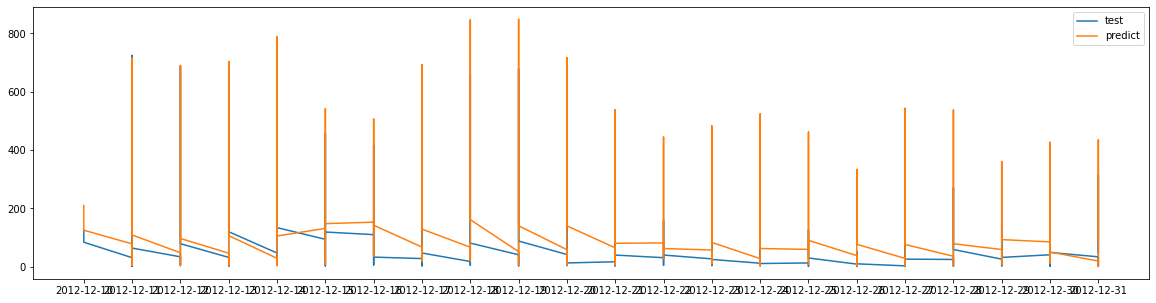

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.plot(test_data['dteday'], y_test_num, label = 'test')
plt.plot(test_data['dteday'], y_pred_test, label = 'predict')
plt.legend()
plt.show()

## 06. Evaluation on Test set & make a pipeline

* Go? or Not to go?
* 모든 규칙을 정리하여 파이프라인을 제작하자.

# ML Pipeline for system

Training Work Flow 의 모든 것을 재활용 한다.
* 처음에 pipeline부터 먼저 그린다. 같이 그리자!

**To-Do**
1. Training Phase : **전체 데이터를 이용하여 모델을 만든다.**(train/valid/test안나눈다.)
    * 하지만 이 실습에서는, 주어진 데이터만을 이용해야 하기 때문에 마지막 21일을 new_data로 떼어둔다.
    * 나머지 데이터를 old_data로 떼어둔다.
    * new_data는 마치 진짜로 데이터가 새로 들어올 때 처럼 사용할 것이다.

3. Prediction Phase :
    * new_data를 이용하여 예측값을 만들어본다.
4. Monitoring ?

## 01. Training Phase for model serving

* Training Work Flow의 여러 규칙들을, 전체 데이터(old_data)를 이용하여 다시 제작하면 됨.


## 02. Prediction Phase

**아래 내용들을 이용하여 진행한다.**
* 위 Training Phase에서 제작한 규칙
* 위 Training Phase에서 제작한 모델

## 03. Monitoring을 한다면?
** Discussion **